### Instructions
Find a data set that you are interested in over the internet. It can be of any field (sports, music, games, etc.).

Take note of where you got the data, the date you gathered it, and if there are other important notes regarding it. 

Using Jupyter, execute the following:

1. All values should be set to two decimal places only. 

2. Load the data set to your notebook. 

3. Determine the 'shape' of the data. 

4. Display the first five rows of each column. 

5. Display the current names of each column. 

6. Display the data types of each column. 

7. Display the non-null values of each column. 

8. Show the statistical description of each column. 

9. Change all the column names to the following naming convention (all small cases, no spaces in between, no symbols).

10. Show a data visualization navigation for each data set. 

 

Then using Python Jupyter Notebook, describe the data set in terms of: 

1. Statistical measurements of each of the features of the data. 

2. Create a graphic representation of three of the most interesting features and describe why is it significant for you.

3. Determine if the data has the potential for machine learning goals and what applications you think can use this data.

4. Discuss potential issues and anomalies seen in the data (missing data, outliers, etc.).

5. Why do you think knowing and exploring data is important before going through and applying machine learning algorithms? 

### Data Set References

Data set came from grouplens see here [dataset](https://grouplens.org/datasets/movielens/).

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Load the data set to your notebook

In [234]:
# 1. Load the dataset
df = pd.read_csv("./datasets/movie-lens/ratings.csv", sep=",")

movies_df = pd.read_csv("./datasets/movie-lens/movies.csv", sep=",")
ratings_df = pd.read_csv('./datasets/movie-lens/ratings.csv', sep=',')

In [235]:
# Only get the first 100 rows
ratings_df = ratings_df[:500]
movies_df = movies_df[:500]

#### 2. Determine the `shape` of the data.

In [236]:
df.shape

(100836, 4)

#### 3. Display the first five rows of each column.

In [237]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### 4. Display the current names of each column

In [238]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

#### 5. Display the data types of each column

In [239]:
df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

#### 6. Display the non-null values of each column

In [240]:
df.notnull().sum()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

#### 7. Show the statistical description of each column

In [241]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### 8. Change all the column names to the following naming convention (all small cases, no spaces in between, no symbols)

In [242]:
df.rename({"userId": "user_id", "movieId": "movie_id"}, axis=1, inplace=True)
df

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### 9. Show a data visualization navigation for each dataset


In [243]:
# Merge the movies and ratings dataframes
df = pd.merge(movies_df, ratings_df, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,21,Get Shorty (1995),Comedy|Crime|Thriller,4,3.0,986935199
4,31,Dangerous Minds (1995),Drama,3,0.5,1306463578


/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/921564488.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/921564488.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('title').mean()['rating'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))


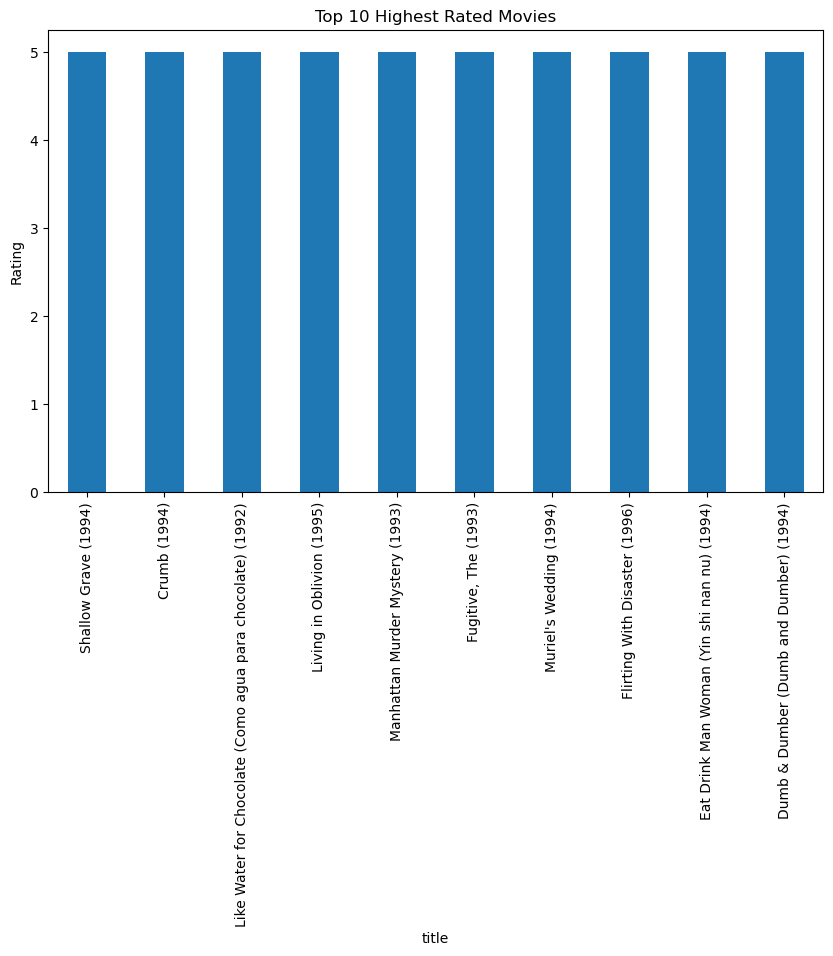

In [244]:
# Group the visualizations 

# Visualize the ratings based on the genre of the movie using a bar plot
df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Genre')
plt.ylabel('Rating')
plt.show

# Visualize the highest rated movies using a bar plot
df.groupby('title').mean()['rating'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Highest Rated Movies')
plt.ylabel('Rating')
plt.show()

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/4063688244.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))


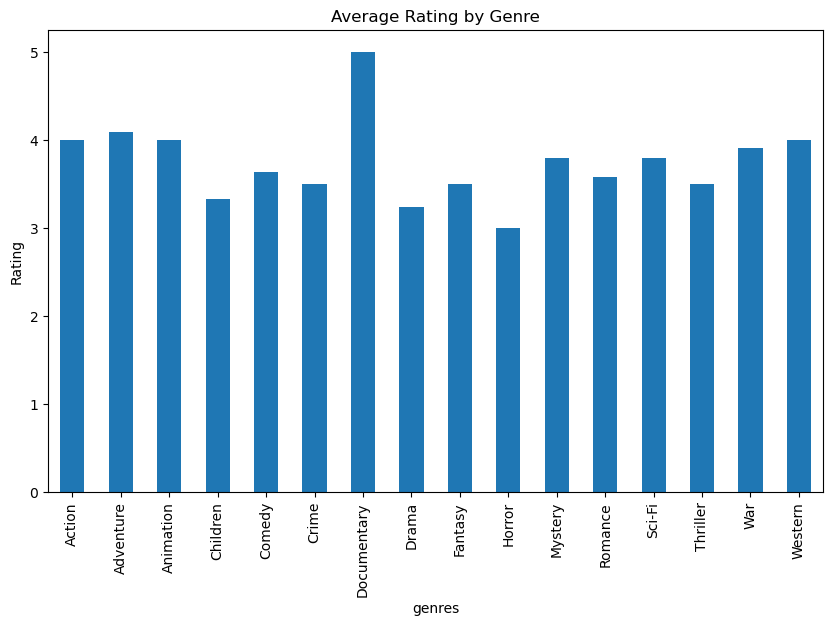

In [245]:
# Seperate the genres into columns and visualize the ratings based on the genre of the movie using a bar plot
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')
df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Genre')
plt.ylabel('Rating')
plt.show()

In [246]:
# Convert the timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
# Add a column for the year
df['timestamp_year'] = df['timestamp'].dt.year.astype("Int64")

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/2202082758.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)
/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/2202082758.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)


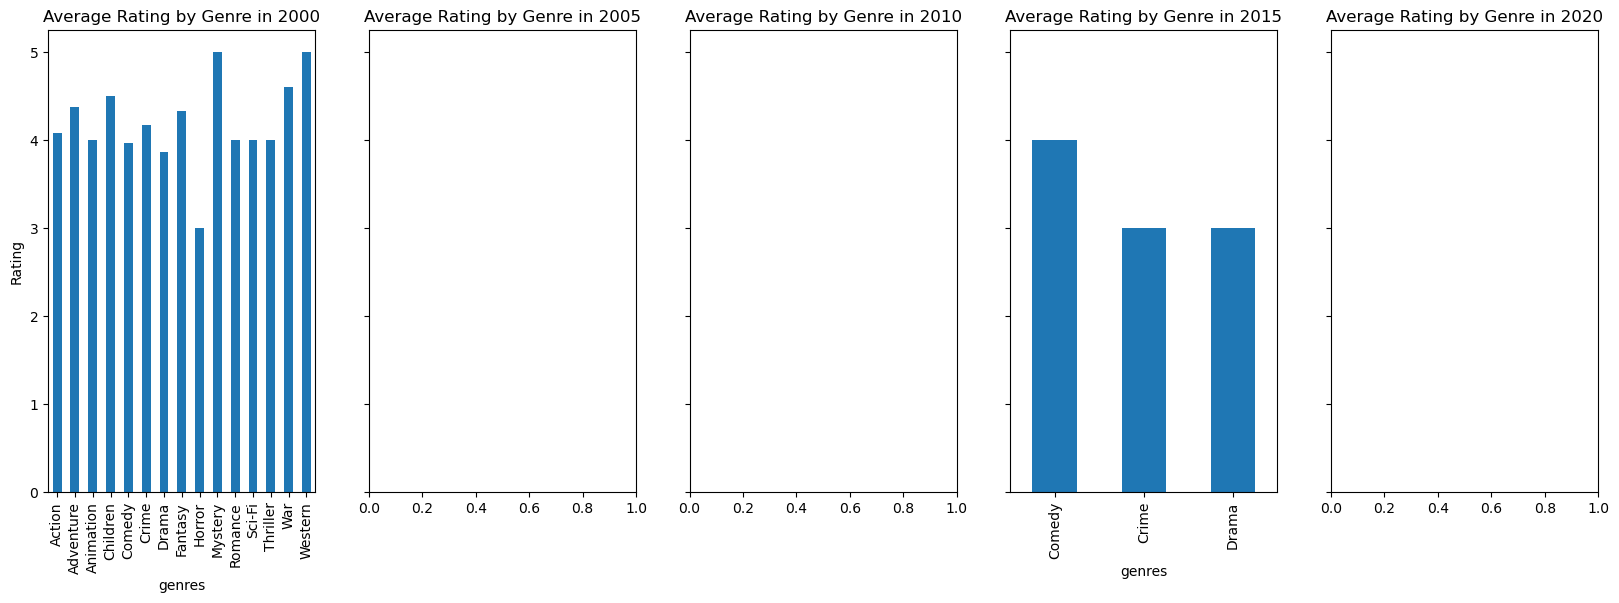

In [265]:
# Visualize a list of the average ratings by genre for each year using a grouped subplots
years_to_check = [2000, 2005, 2010, 2015, 2020]


fig, axes = plt.subplots(1, len(years_to_check), figsize=(20, 6), sharey=True)
for i, year_to_check in enumerate(years_to_check):
    axes[i].set_title(f'Average Rating by Genre in {year_to_check}'.format(year_to_check))
    axes[i].set_ylabel('Rating')
    # Check if the years is in the dataset
    if year_to_check in df['timestamp_year'].unique():
        df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)
        # Rotate the xticks
        axes[i].tick_params(axis='x', rotation=90)
        continue
plt.show()